In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
pd.set_option('display.max_columns',None)



from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

sns.set(style='whitegrid')
plt.rcParams['figure.figsize']=(15,5)
%config InlineBackend.figure_format = 'png'
%matplotlib inline

Загружаем данные в датафреймы 

In [2]:
df_shops = pd.read_pickle("./df_shops.pkl")
df_points = pd.read_pickle("./df_points.pkl")
df_left = pd.read_pickle("./df_left.pkl")


In [3]:

df_category = pd.read_pickle("./df_category.pkl")
df_checks_with_cat = pd.read_pickle("./df_checks_with_cat.pkl")
df_pivot_table = pd.read_pickle("./df_pivot_table.pkl")
df_week_diff = pd.read_pickle("./df_week_diff.pkl")
df_week_diff_cum = pd.read_pickle("./df_week_diff_cum.pkl")


Выделяем молочную продукцию

In [4]:
df_checks_milk = df_checks_with_cat[df_checks_with_cat['name_gr'] == 'Молочная Продукция' ]

In [5]:
all_sales_bad = df_checks_milk[df_checks_milk['good_or_bad'] == -1 ]['BaseSum'].sum()
all_sales_average = df_checks_milk[df_checks_milk['good_or_bad'] == 0 ]['BaseSum'].sum()
all_sales_good = df_checks_milk[df_checks_milk['good_or_bad'] == 1 ]['BaseSum'].sum()

In [ ]:
df_checks_milk.head(3)

,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad_y
0,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0


In [6]:
df_checks_milk_pivot = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad'],values = ['BaseSum'],aggfunc= 'sum',fill_value=0).reset_index()

In [7]:
df_checks_milk_pivot.set_index(df_checks_milk_pivot['good_or_bad'],inplace=True)
del df_checks_milk_pivot['good_or_bad']
df_checks_milk_pivot = df_checks_milk_pivot.transpose()

In [8]:
df_checks_milk_pivot

good_or_bad         -1.0          0.0         1.0
        hour                                     
BaseSum 0         813.56        84.00        0.00
        1         473.24        41.82        0.00
        2        1872.72       572.70        0.00
        3          50.91      1004.56        0.00
        4          70.91       250.91       75.45
        5        2098.70       210.18        0.00
        6        7640.12      2079.77      197.32
        7      785262.94    275120.65     7356.66
        8     2385948.78   2075685.31   503421.36
        9     3654148.11   3719846.68  2008228.16
        10    4219121.26   5017516.18  2718435.05
        11    5393122.68   6653913.53  3795858.76
        12    6365146.06   8135887.61  4605914.61
        13    6445531.44   8189689.23  4680016.67
        14    5969810.00   7703070.90  4424828.95
        15    5955317.41   7667993.08  4321982.85
        16    6504549.27   8189251.86  4572633.54
        17    7341607.55   9095351.45  5100458.98
        18    8658083.47  10202377.45  5781604.50
        19    8566505.91  10070002.23  5677720.64
        20    6694239.59   7900712.62  4367668.58
        21    4520395.37   5286119.27  2776377.98
        22    1585605.56    632735.55    99980.90
        23     436906.10    145285.13      708.56

In [9]:
df_checks_milk_pivot[-1] = df_checks_milk_pivot[-1].div(all_sales_bad).mul(100)
df_checks_milk_pivot[1] = df_checks_milk_pivot[1].div(all_sales_good).mul(100)
df_checks_milk_pivot[0] = df_checks_milk_pivot[0].div(all_sales_average).mul(100)

In [11]:
#df_checks_milk_pivot.plot(kind="barh",figsize=(10,50))

In [12]:
df_checks_milk

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
15963683,083B4692-F8E0-EC11-9064-005056A7A8DF,15714,59900,1.0,2022-05-31,22,22.91,18,Молочная Продукция,Детское ложковое молочное питание,0.0
15963684,AEF56458-EDE0-EC11-9064-005056A7A8DF,15714,59900,2.0,2022-05-31,22,45.82,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963685,C8345BA4-EDE0-EC11-9064-005056A7A8DF,15714,59900,2.0,2022-05-31,22,41.12,17,Молочная Продукция,Детское ложковое молочное питание,0.0
15963686,E0F234B2-F4E0-EC11-9064-005056A7A8DF,15714,59900,1.0,2022-05-31,22,22.73,18,Молочная Продукция,Детское ложковое молочное питание,0.0


In [14]:
df_checks_milk_variety = df_checks_milk.pivot_table(columns=['hour'],index=['good_or_bad'],values = ['id_tov_cl'],aggfunc= 'nunique',fill_value=0).reset_index()

In [ ]:
df_checks_milk_variety

good_or_bad_y id_tov_cl                                                \
hour                       0  1   2  3  4   5   6    7    8    9   10   11   
0             -1.0         6  6  10  1  1  12  35  303  319  335  332  334   
1              0.0         1  1   5  1  2   2  17  259  311  318  320  325   
2              1.0         0  0   0  0  1   0   4   61  278  303  306  311   

                                                                  
hour   12   13   14   15   16   17   18   19   20   21   22   23  
0     338  333  336  337  342  341  339  342  344  337  327  304  
1     326  326  325  329  326  331  328  327  328  331  304  255  
2     315  319  314  311  313  320  318  322  317  312  216    9

In [16]:
df_checks_milk_variety.set_index(df_checks_milk_variety['good_or_bad'],inplace=True)
del df_checks_milk_variety['good_or_bad']

In [18]:
#df_checks_milk_variety.transpose().plot(kind="barh",figsize=(10,50))

In [26]:
df_checks_with_cat[]

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
15963717,926946EB-0EE1-EC11-9064-005056A7A8DF,12618,37800,1.0,2022-05-31,22,85.00,21,Напитки,Соки,0.0
15963718,BBFD7F55-10E1-EC11-9064-005056A7A8DF,16061,24000,1.0,2022-05-31,22,75.00,21,"Сладости, кондитерские изделия",Пряники,-1.0
15963719,61ACDF39-C8E0-EC11-9064-005056A7A8DF,16061,37800,1.0,2022-05-31,22,85.00,12,Напитки,Соки,-1.0
15963720,0787699D-B3E0-EC11-9064-005056A7A8DF,16061,62800,1.0,2022-05-31,22,390.91,10,Мясо. Птица. П/ф охл. Яйца,Говядина.Телятина.,-1.0


In [27]:
df_checks_with_cat['Check_sum'] = df_checks_with_cat['BaseSum'].groupby(df_checks_with_cat['CheckUID']).transform('sum')

In [35]:
df_checks_with_cat['Item_milk_share'] = df_checks_with_cat['BaseSum'].div(df_checks_with_cat['Check_sum']).mul(	df_checks_with_cat['name_gr'] == 'Молочная Продукция')

In [244]:
df_checks_with_cat

,CheckUID,id_tt_cl,id_tov_cl,Quantity,date_ch,week,BaseSum,hour,name_gr,name_gr2,good_or_bad,Check_sum,Item_milk_share
0,374BC969-4D99-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,13,Молочная Продукция,Сметана,-1.0,489.09,0.243493
1,6A9DF7ED-7899-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0,518.18,0.229824
2,6FC5327A-8499-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,20,Молочная Продукция,Сметана,-1.0,488.63,0.243722
3,86F9A4A3-7199-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,18,Молочная Продукция,Сметана,-1.0,445.45,0.267348
4,AC9C4F6B-5299-EC11-9064-005056A7A8DF,10864,52,1.0,2022-03-01,9,119.09,14,Молочная Продукция,Сметана,-1.0,639.54,0.186212
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15963717,926946EB-0EE1-EC11-9064-005056A7A8DF,12618,37800,1.0,2022-05-31,22,85.00,21,Напитки,Соки,0.0,568.60,0.000000
15963718,BBFD7F55-10E1-EC11-9064-005056A7A8DF,16061,24000,1.0,2022-05-31,22,75.00,21,"Сладости, кондитерские изделия",Пряники,-1.0,2126.15,0.000000
15963719,61ACDF39-C8E0-EC11-9064-005056A7A8DF,16061,37800,1.0,2022-05-31,22,85.00,12,Напитки,Соки,-1.0,1254.70,0.000000
15963720,0787699D-B3E0-EC11-9064-005056A7A8DF,16061,62800,1.0,2022-05-31,22,390.91,10,Мясо. Птица. П/ф охл. Яйца,Говядина.Телятина.,-1.0,517.77,0.000000


In [122]:
df_checks_with_milk_percent = df_checks_with_cat.groupby(['CheckUID','id_tt_cl','Check_sum']).Item_milk_share.agg('sum').reset_index()

Классфицицируем чеки по объему и проценту молочки

In [233]:
conditions_m = [
    (df_checks_with_milk_percent['Item_milk_share'] == 0),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.05)),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0.05) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.10)),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0.10) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.20)),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0.20) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.40)),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0.40) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.60)),
    ((df_checks_with_milk_percent['Item_milk_share'] > 0.60) & (df_checks_with_milk_percent['Item_milk_share'] <= 0.80)),
    (df_checks_with_milk_percent['Item_milk_share'] > 0.80) 
]
values_m = ['0','0_5','5_10','10_20','20_40','40_60','60_80','80_100']

df_checks_with_milk_percent['milk_percent'] = np.select(conditions_m,values_m )

In [234]:
conditions_s = [
    ((df_checks_with_milk_percent['Check_sum'] > 0) & (df_checks_with_milk_percent['Check_sum'] <= 200)),
    ((df_checks_with_milk_percent['Check_sum'] > 200) & (df_checks_with_milk_percent['Check_sum'] <= 500)),
    ((df_checks_with_milk_percent['Check_sum'] > 500) & (df_checks_with_milk_percent['Check_sum'] <= 1000)),
    ((df_checks_with_milk_percent['Check_sum'] > 1000) & (df_checks_with_milk_percent['Check_sum'] <= 1500)),
    ((df_checks_with_milk_percent['Check_sum'] > 1500) & (df_checks_with_milk_percent['Check_sum'] <= 2000)),
    ((df_checks_with_milk_percent['Check_sum'] > 2000) & (df_checks_with_milk_percent['Check_sum'] <= 3000)),
    (df_checks_with_milk_percent['Check_sum'] > 3000) 
]
values_s = ['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']

df_checks_with_milk_percent['revenue'] = np.select(conditions_s,values_s)

In [235]:
good_shops = df_shops['id_tt'].loc[df_shops['good_or_bad'] == 1].values.tolist()
bad_shops = df_shops['id_tt'].loc[df_shops['good_or_bad'] == -1].values.tolist()

In [236]:
df_milk_checks_good_shop = df_checks_with_milk_percent[df_checks_with_milk_percent['id_tt_cl'].isin(good_shops)]
df_milk_checks_bad_shop = df_checks_with_milk_percent[df_checks_with_milk_percent['id_tt_cl'].isin(bad_shops)]

In [237]:
df_milk_checks_good_shop_p = df_milk_checks_good_shop.pivot_table(columns=['revenue'], index=['milk_percent'], values = ['Check_sum'],aggfunc= 'sum',fill_value=0 ).reset_index()
df_milk_checks_good_shop_p.set_index(df_milk_checks_good_shop_p['milk_percent'],inplace=True)
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p['Check_sum']
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p.div(df_milk_checks_good_shop_p.values.sum()).mul(100)
del df_milk_checks_good_shop_p['0']

In [238]:
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop.pivot_table(columns=['revenue'], index=['milk_percent'], values = ['Check_sum'],aggfunc= 'sum',fill_value=0 ).reset_index()
df_milk_checks_bad_shop_p.set_index(df_milk_checks_bad_shop_p['milk_percent'],inplace=True)
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p['Check_sum']
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p.div(df_milk_checks_bad_shop_p.values.sum()).mul(100)
del df_milk_checks_bad_shop_p['0']

In [239]:
df_milk_checks_bad_shop_p = df_milk_checks_bad_shop_p[['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']]
df_milk_checks_bad_shop_p.reindex(['0','0_5','5_10','10_20','20_40','40_60','60_80','80_100'])
df_milk_checks_bad_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_percent,,,,,,,
0,6.303855,16.796160,16.083748,7.298257,3.560479,2.733890,1.361349
0_5,0.000000,0.007046,0.267419,0.820529,1.059119,1.284044,1.258819
10_20,0.041093,1.807026,3.798963,2.804814,1.808657,1.769135,1.142019
20_40,0.382060,2.570843,3.707117,2.089845,1.069380,0.809659,0.339557
40_60,0.394144,1.293976,1.333496,0.445579,0.172140,0.074304,0.017965
5_10,0.000380,0.251659,2.323839,2.205272,1.360701,1.589803,1.182985
60_80,0.246159,0.740333,0.488190,0.110348,0.032052,0.016629,0.002416
80_100,1.278971,1.063731,0.325514,0.046682,0.016152,0.007792,0.003904


In [240]:
df_milk_checks_good_shop_p = df_milk_checks_good_shop_p[['0_200','200_500','500_1000','1000_1500','1500_2000','2000_3000','3000']]
df_milk_checks_good_shop_p.reindex(['0','0_5','5_10','10_20','20_40','40_60','60_80','80_100'])
df_milk_checks_good_shop_p

revenue,0_200,200_500,500_1000,1000_1500,1500_2000,2000_3000,3000
milk_percent,,,,,,,
0,5.739219,15.940529,16.087497,6.791219,3.045836,2.158940,0.856435
0_5,0.000028,0.010418,0.354462,0.836122,1.024294,1.117112,0.889538
10_20,0.054008,1.992487,4.379949,2.980515,1.739332,1.589383,0.912554
20_40,0.411936,2.999858,4.342344,2.361775,1.114925,0.791501,0.276761
40_60,0.450855,1.605338,1.638754,0.588652,0.190950,0.097450,0.014677
5_10,0.000756,0.313367,2.576901,2.315714,1.302501,1.373430,0.934600
60_80,0.289488,0.972970,0.643365,0.132586,0.031863,0.011037,0.006067
80_100,1.692457,1.490766,0.442772,0.063093,0.011193,0.005372,0.004051


In [241]:
df_milk_checks_dif_shop_p = df_milk_checks_good_shop_p - df_milk_checks_bad_shop_p

In [242]:
df_milk_checks_dif_shop_p = df_milk_checks_dif_shop_p.reindex(['0','0_5','5_10','10_20','20_40','40_60','60_80','80_100'])

<AxesSubplot:xlabel='revenue', ylabel='milk_percent'>

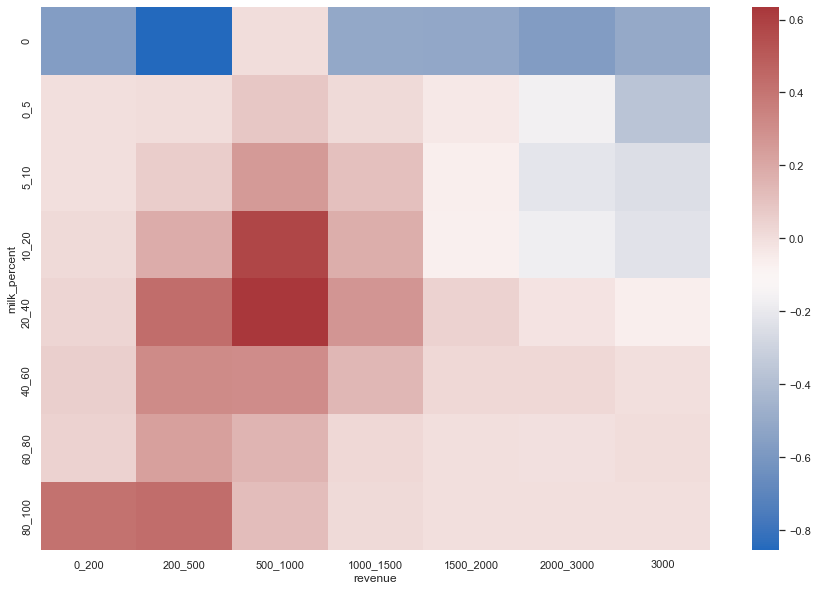

In [243]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_milk_checks_dif_shop_p,cmap='vlag')